In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## Gradient based optimization

Each dense layer from the MNIST example transforms its input data as follows:

$output = activation(dot(W, input) + b)$

In this expression, $W$ and $b$ are tensors that are the **trainable parameters** of the model. These parameters contain the information learned by the model during the training process. Initially, parameters are filled with small random values. During training these parameters are gradually adjusted to improve the performance of the model.

To be able to train a model we need to wrap it in a so called **loss function**. The loss function returns a single scalar value and measures how good the model is in prediction labels. A perfect model would have zero loss.

The goal of **optimization** is to minimize the loss given a set of examples.


## Train loop

Model training in general executes the following loop:

 1. Draw a batch of training samples `x` and corresponding labels `y`
 2. Run the model on `x` to obtain predictions `y_pred`
 3. Compute the loss of the model on the batch, a measure of the mismatch between `y_pred` and `y`
 4. Update all weights of the model in a way that slightly reduces the loss on this batch
 
The training will eventually end up with a model that has a very low loss on its training data. 

A low loss means there is a low mismatch between predictions `y_pred` and true labels `y`.
 
The interesting part of the training loop is step 4. How can we update the individual parameters of the model to reduce the loss and get better predictions? 

We'll take advantage of the fact that all model operations are differentiable, and compute the gradient of the loss function with respect to the model's parameters. You can then move the parameters in the opposite direction from the gradient, thus decreasing the loss.

## What is a gradient?

Consider a continuous, smooth function $f(x) = y$, mapping a real number x to a real number y.

The derivative of $f(x)$ is written as: 

$$f'(x) = \frac{d}{dx}f(x) = \frac{d f(x)}{dx}$$

$\frac{d f(x)}{dx}$ is called the **differential operator**. 

You can think of $\frac{d f(x)}{dx}$ as an operator that maps a function of one parameter to the derivative of the function.

The value of $\frac{d f(x)}{dx}$ is simply the **slope** of $f(x)$ at some given point $p$.

If the derivative is **negative**, it means a small change of x around p will result in a decrease of f(x). 

If the derivative is **positive**, a small change in x will result in an increase of f(x). 

Further, the absolute value of the derivative tells you how quickly this increase or decrease will happen.

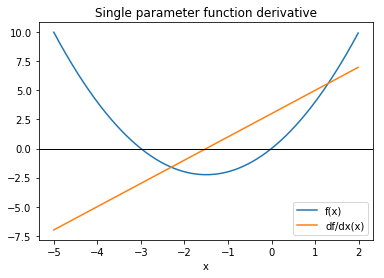

In [3]:
def f(x): return x**2 + 3 * x
def df_dx(x): return 2 * x + 3

x= np.arange(-5, 2, 0.01)
plt.title('Single parameter function derivative')
plt.xlabel('x')
plt.plot(x, f(x), label='f(x)')
plt.plot(x, df_dx(x), label='df/dx(x)')
plt.axhline(linewidth=1, color='black')
plt.legend()
plt.show()

Lets consider the case when a function $f(x_1, x_2)$ has multiple input variables.

In this case each input variable contributes to the value of the function and it does not make sense to have a single derivative for the function. 

Instead we compute derivatives with respect to one variable at a time, these are called **partial derivatives**.

Instead of using the differential operator $\frac{d}{dx}$, we use the **partial differential operator** $ \frac{\partial}{\partial x}$.

For a function $f(x_1, x_2)$ the partial derivatives are $\frac{\partial}{\partial x_1}f(x)$ and $\frac{\partial}{\partial x_2}f(x)$. 

The partial derivative with respect to $x_i$ is calculated just like the derivative for a single variable function, simply treating any other variables in the equation as a constant.

The partial derivative w.r.t $x_i$ tells us how the value of $f(x_1, x_2)$ will change if we change $x_i$ a little bit.

The vector of partial derivatives is called the **gradient** of $f(x_1, x_2)$:

$$
\nabla f(x_1,x_2) = \left [ \frac{\partial f(x_1,x_2)}{\partial x_1}, \frac{\partial f(x_1,x_2)}{\partial x_2} \right ]
$$

The $\nabla$ is called the Nabla operator.

In machine learning most of the time we use functions that take vectors or matrics as input. So instead of functions with scalar variables like $f(x_1, x_2)$ we use something like $f(x)$ where x is a vector $x=[x_1, x_2]$. 

The gradient of $f(x)$ looks like this:

$$
\nabla f(x) = \left [ \frac{\partial f(x)}{\partial x_1}, \frac{\partial f(x)}{\partial x_2} \right ]
$$

**Note:** Using functions that take tensors as input is very useful. The functions become more useful

In [25]:
def f(x): 
    return x[0]**2 + x[1]**2

def grad_f(x): 
    df_dx1 = 2 * x[0]
    df_dx2 = 2 * x[1]
    return np.array([df_dx1, df_dx2])

The gradient is a vector that points into the direction of greatest increase of $f(x)$. 

To minimize $f(x)$ (e.g. finding the $x$ where $f(x)$ is minimal) all we need to do is to repeatedly take a small step in the direction of the negative gradient. Its important to only take a small step because the gradient is only a good approximation of $f(x)$ in its immediate surrounding.

Update rule:

$$
x_n = x_{n-1} - \alpha \ \nabla f(x)
$$

Lets look at a simple example:

Final x=[0.00207927 0.00249601]
Final f(x)=0.000011


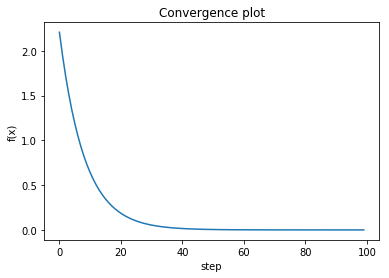

In [69]:
# f(x) is the function we want to minimize
def f(x):
    return x[0]**2 + x[1]**2

# Gradient of f(x)
def grad_f(x):
    return np.array([2 * x[0], 2 * x[1]])

max_steps = 100
alpha = 0.03
initial_x = np.random.rand(2) * 5.0 # # initialize x_0 random

x = initial_x
f_hist = []
for step in range(max_steps):
    x = x - alpha * grad_f(x) # update rule
    f_hist.append(f(x))
print('Final x=%s' % x)
print('Final f(x)=%f' % f(x))

plt.title('Convergence plot')
plt.xlabel('step')
plt.ylabel('f(x)')
plt.plot(f_hist)
plt.show()


You can see from the plot that at some step the value of $f(x)$ does not change any more, the process has converged.

This algorithm is called **Gradient Descent**. The given implementation is a very primitive version to demonstrate how the algorithm works. Production ready implementation would be highly optimized and take advantage of hardware accelerators like vectorized CPU instructions, GPUs or TPUs.

Parameter $\alpha$ is also called the **learning rate**. The learning rate is one of the most important parameters in ML problems. If it is not properly set the training process might take much longer or may not converge at all.  

We can not come up with a more detailed version of the training loop:

 1. Draw a batch of training samples `x` and corresponding labels `y`
 2. Run the model on `x` to obtain predictions `y_pred`
 3. Compute the loss of the model on the batch, a measure of the mismatch between `y_pred` and `y`
 4. Compute the gradient of the loss with regard to the network’s parameters
 5. Move the parameters a little in the negative direction from the gradient: `W = W - lr * gradient` 

**TODO** what is missing here is the averaging of the gradients before we update the parameters

This is called mini-batch stochastic gradient descent (mini-batch SGD). The term stochastic refers to the fact that each batch of data is drawn at random (stochastic is a fency word for random).

Note that a variant of the mini-batch SGD algorithm would be to draw a single sam- ple and target at each iteration, rather than drawing a batch of data. This would be true SGD (as opposed to mini-batch SGD). Alternatively, going to the opposite extreme, you could run every step on all data available, which is called batch SGD. Each update would then be more accurate, but far more expensive. The efficient compromise between these two extremes is to use mini-batches of reasonable size.



## Loss

<img src="images/cartoon_loss.png" height="300" width="400"/>

This is a cartoon depicting the effects of different learning rates:

 * With low learning rate the improvements will be almost linear
 * High learning rates will decay the loss faster, but they get stuck at worse values of loss (green line). This is because there is too much "energy" in the optimization and the parameters are bouncing around chaotically, unable to settle in a nice spot in the optimization landscape.
 * With very high learning rate the loss may even grow exponentially

<img src="images/real_loss.png" height="300" width="400"/>

This is what a reasonable loss might look like. The 'noise' is generated by the batching of the dataset.

## Loss function

Loss measures the compatibility between a prediction and the ground truth label. The loss takes the form of an average over the data losses for every individual example:

$$
L = \frac{1}{N}\sum_i^N L_i
$$

where N is the number of training examples.

A common choice for multi-class classification is the Softmax classifier that uses the cross-entropy loss:

$$
L_i = -log(\frac{e^{f_{y_i}}}{\sum_j e^{f_j}})
$$

What does this mean?

$f(x_i)$ is the output of the layer before the softmax. It is a vector that has as many elements as we have classes. Each element is the unnormalized probability for the corresponding class. $f_k$ is the k-th element of this vector.

The **softmax function** is a popular choice to normalize probabilities (make them sum to 1). In our case it normalizes the unnormalized probability of the true label.

At last we calculate the negative log of the predicted probability of the true class. This is called **cross entropy function**.

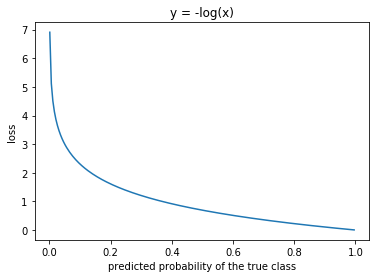

In [25]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.001, 1.0, 0.005)
y = -np.log(x)
plt.plot(x,y)
plt.title('y = -log(x)')
plt.ylabel('loss')
plt.xlabel('predicted probability of the true class')
plt.show()

A high predicted probability for the true class results in a low loss. The cross entropy function only cares about the predicted probability of the true class and ignores the probabilities of the other classes.

Reminder why we need the loss function:
 1. At training it measures the train error (the loss) of the model prediction after the forward pass. This controls the gradient updates during backpropagation.
 2. At evaluation is measures the evaluation error.
 
The input to a cross-entropy loss must be a probability distribution. It can not be used with unnormalized scores: the log is not defined for negative numbers and for scores > 1 the loss becomes negative. 